<a href="https://colab.research.google.com/github/HBB07/SupplyChain/blob/main/SupplyChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DATASET/supply_chain_data.csv')

In [21]:
# Explore the dataset
print(data.head())  # Display the first few rows of the dataset

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [22]:
# Basic statistics
print(data.describe())  # Display basic statistics of numerical columns

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

In [23]:
# Product Type distribution
product_type_counts = data['Product type'].value_counts()
print(product_type_counts)

skincare     40
haircare     34
cosmetics    26
Name: Product type, dtype: int64


In [24]:
# Gender distribution
gender_counts = data['Customer demographics'].value_counts()
print(gender_counts)

Unknown       31
Female        25
Non-binary    23
Male          21
Name: Customer demographics, dtype: int64


<ipython-input-25-da36c9409542>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


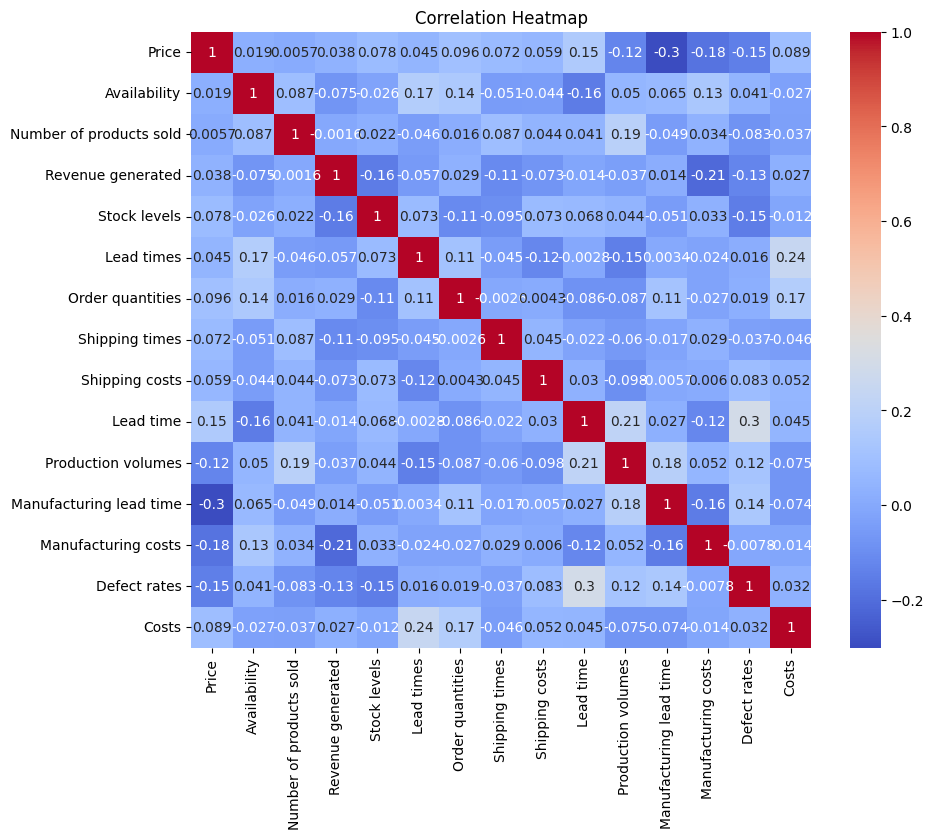

In [25]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# Top selling SKUs
top_selling_skus = data.groupby('SKU')['Number of products sold'].sum().sort_values(ascending=False)
print(top_selling_skus.head())

SKU
SKU10    996
SKU94    987
SKU9     980
SKU36    963
SKU37    963
Name: Number of products sold, dtype: int64


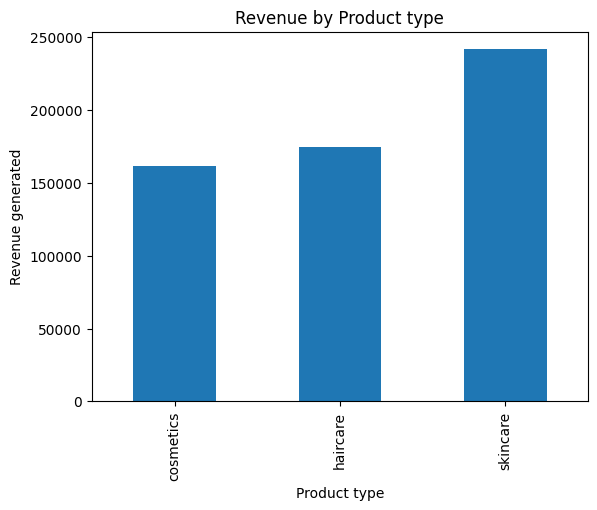

In [27]:
# Revenue by Product Type
revenue_by_product_type = data.groupby('Product type')['Revenue generated'].sum()
revenue_by_product_type.plot(kind='bar')
plt.title('Revenue by Product type')
plt.xlabel('Product type')
plt.ylabel('Revenue generated')
plt.show()

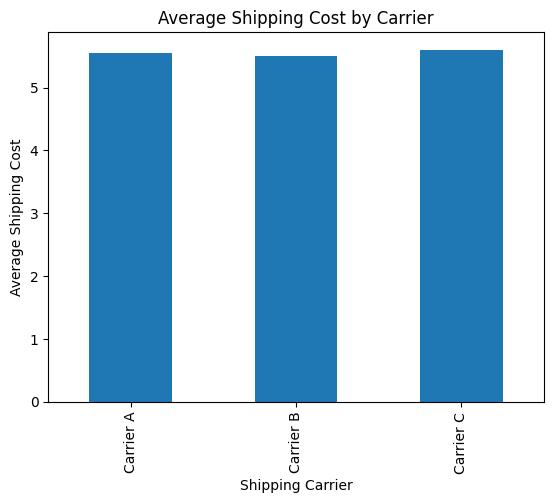

In [28]:
# Average shipping cost by Carrier
avg_shipping_cost_by_carrier = data.groupby('Shipping carriers')['Shipping costs'].mean()
avg_shipping_cost_by_carrier.plot(kind='bar')
plt.title('Average Shipping Cost by Carrier')
plt.xlabel('Shipping Carrier')
plt.ylabel('Average Shipping Cost')
plt.show()

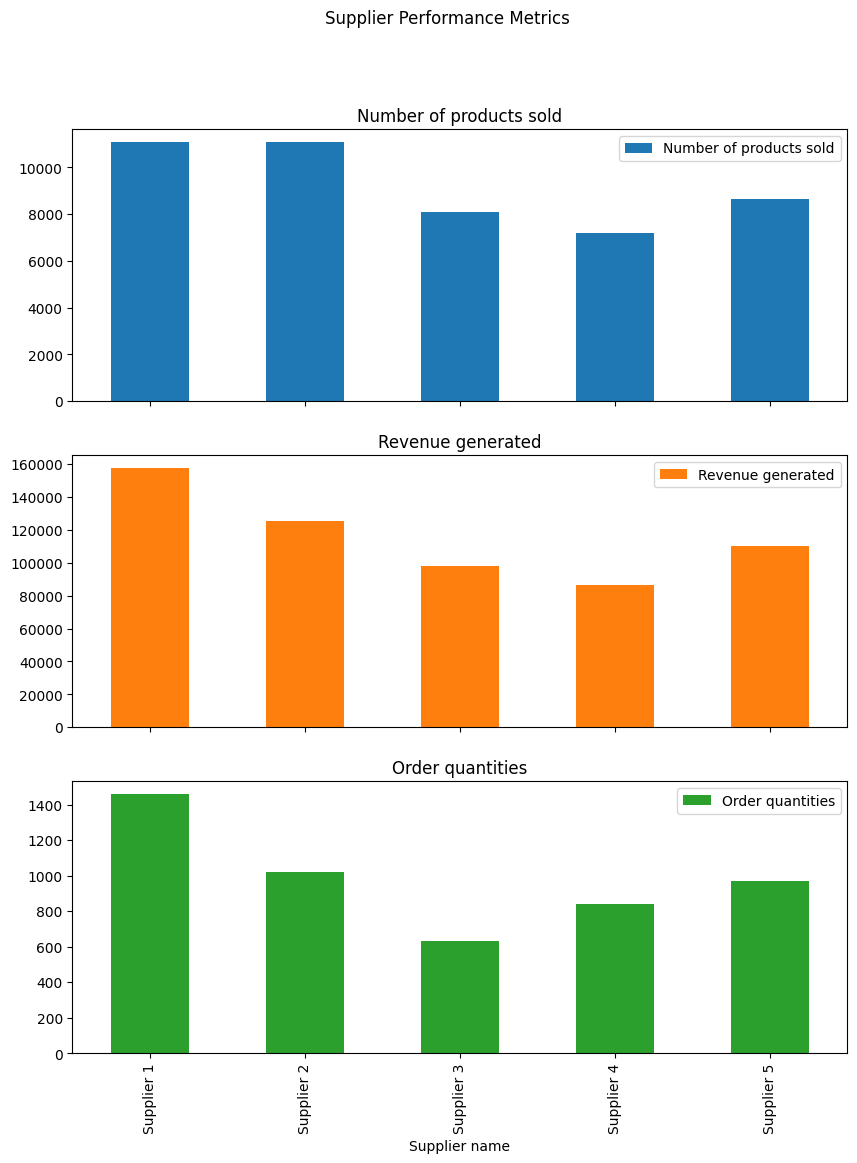

In [29]:
# Supplier performance
supplier_performance = data.groupby('Supplier name').agg({
    'Number of products sold': 'sum',
    'Revenue generated': 'sum',
    'Order quantities': 'sum'
})
supplier_performance.plot(kind='bar', subplots=True, layout=(3, 1), figsize=(10, 12))
plt.suptitle('Supplier Performance Metrics')
plt.show()

In [30]:
# Most profitable SKUs
most_profitable_skus = data.groupby('SKU')['Revenue generated'].sum().sort_values(ascending=False)
print("Most Profitable SKUs:")
print(most_profitable_skus.head())

Most Profitable SKUs:
SKU
SKU51    9866.465458
SKU38    9692.318040
SKU31    9655.135103
SKU90    9592.633570
SKU2     9577.749626
Name: Revenue generated, dtype: float64


In [31]:
# Most expensive suppliers
most_expensive_suppliers = data.groupby('Supplier name')['Price'].mean().sort_values(ascending=False)
print("Most Expensive Suppliers:")
print(most_expensive_suppliers.head())

Most Expensive Suppliers:
Supplier name
Supplier 1    59.226639
Supplier 2    46.542244
Supplier 4    46.329703
Supplier 3    45.456788
Supplier 5    44.856168
Name: Price, dtype: float64


In [33]:
# Most efficient production locations
efficient_locations = data.groupby('Location')['Lead time'].mean().sort_values()
print("Most Efficient Production Locations:")
print(efficient_locations.head())

Most Efficient Production Locations:
Location
Delhi        14.600000
Mumbai       15.318182
Bangalore    16.277778
Chennai      18.650000
Kolkata      19.440000
Name: Lead time, dtype: float64


In [36]:
# Most common inspection results
common_inspection_results = data['Inspection results'].value_counts()
print("Most Common Inspection Results:")
print(common_inspection_results)

Most Common Inspection Results:
Pending    41
Fail       36
Pass       23
Name: Inspection results, dtype: int64


In [38]:
# Most common defect rates
common_defect_rates = data.groupby('Defect rates')['SKU'].count().sort_values(ascending=False)
print("Most Common Defect Rates:")
print(common_defect_rates.head())

Most Common Defect Rates:
Defect rates
0.018608    1
2.853091    1
3.448063    1
3.376238    1
3.219605    1
Name: SKU, dtype: int64


In [40]:
# Most popular transportation modes
popular_transportation_modes = data['Transportation modes'].value_counts()
print("Most Popular Transportation Modes:")
print(popular_transportation_modes)

Most Popular Transportation Modes:
Road    29
Rail    28
Air     26
Sea     17
Name: Transportation modes, dtype: int64


In [43]:
# Most expensive routes
expensive_routes = data.groupby('Routes')['Shipping costs'].sum().sort_values(ascending=False)
print("Most Expensive Routes:")
print(expensive_routes.head())

Most Expensive Routes:
Routes
Route A    231.327064
Route B    205.423475
Route C    118.064369
Name: Shipping costs, dtype: float64
